In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [7]:
audio_files = glob('C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\SPEECH1_5_2.wav')
# Play audio file
ipd.Audio(audio_files[0])

In [3]:
!pip install numpy soundfile scipy


## FIRST DERIVATIVE WITH FINITE DIFFERENCE METHOD
#### finite difference method is commonly used for computing the derivatives of speech signals. The first derivative of a speech signal can provide valuable information about its characteristics, such as the rate of change in the signal over time. This information can be useful in various speech processing tasks.

In [38]:
import numpy as np
import soundfile as sf

y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

def finite_difference(signal, sampling_rate):
    
    dt = 1 / sampling_rate
    deriv = np.diff(signal) / dt
    return deriv

# Load the audio file
file_path = 'C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\SPEECH1_5_2.wav'
y_8k = librosa.resample(y, orig_sr=sr, target_sr= 500000)

# Compute the first derivative of the audio signal
speech_derivative = finite_difference(y_8k, sr)

# Optionally, you can save the derivative to a new audio file
output_file = 'speech_derivative.wav'
sf.write(output_file, speech_derivative, sr)
print(f"First derivative of the audio signal saved to {output_file}")


y: [-9.28362815e-14 -1.82469098e-13 -3.49319911e-13 -2.80505030e-13
  1.56861923e-13 -1.05432366e-13  7.06409079e-14 -1.44946257e-13
 -2.93978438e-13  1.72479489e-13]
shape y: (61152,)
sr: 22050
First derivative of the audio signal saved to speech_derivative.wav


In [39]:
from IPython.display import Audio
audio_files_out = glob('speech_derivative.wav')
if len(audio_files_out) > 0:
    audio_file = audio_files_out[0]
    display(Audio(audio_file))
else:
    print("No audio file found.")

In [78]:
import matplotlib.pyplot as plt

# List of paths to audio files
audio_files = [
    'C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\SPEECH_5_2.wav',
    'speech_derivative.wav'
]

# Plot all signals on the same plot with different colors
plt.figure(figsize=(10, 6))
for i, audio_file in enumerate(audio_files):
    data, fs = sf.read(audio_file)
    time = np.arange(len(data)) / fs
    plt.plot(time, data, label=f'Audio File {i+1}')

plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Audio Signals Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


LibsndfileError: Error opening 'C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\SPEECH_5_2.wav': System error.

<Figure size 1000x600 with 0 Axes>

## ZERO-CROSSING IN THE FIRST DERIVATIVE SIGNAL

In [40]:
# Function to detect zero crossings
def zero_crossings(signal):
    return np.where(np.diff(np.sign(signal)))[0]

In [41]:
# Detect zero crossings in the first derivative signal
crossings = zero_crossings(speech_derivative)

In [42]:
# Assume first region is speech
speech_regions = [crossings[0]]

In [43]:
# Split into speech and silence regions
for i in range(1, len(crossings)):
    if crossings[i] - crossings[i-1] > 200:  # Adjust threshold as needed
        speech_regions.append(crossings[i])
    else:
        speech_regions[-1] = (speech_regions[-1] + crossings[i]) // 2

# Compute the lengths between consecutive zero crossings
lengths = np.diff(speech_regions)

In [44]:
# Calculate average lengths for speech and silence regions
if len(lengths) > 0:
    average_length_speech = np.mean(lengths)
    average_length_silence = np.mean(lengths)
    print("Average length between two consecutive zero crossings in speech region:", average_length_speech)
    print("Average length between two consecutive zero crossings in silence region:", average_length_silence)
else:
    print("No valid speech or silence regions found.")

Average length between two consecutive zero crossings in speech region: 1066.38515625
Average length between two consecutive zero crossings in silence region: 1066.38515625


Text(0.5, 1.0, 'First Derivative of Audio Signal')

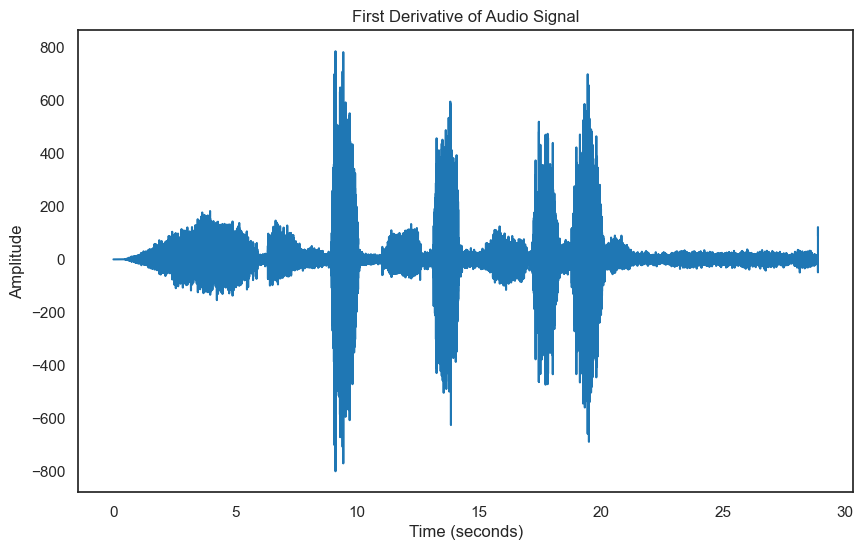

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(speech_derivative)) / fs, speech_derivative, label='First Derivative')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('First Derivative of Audio Signal')

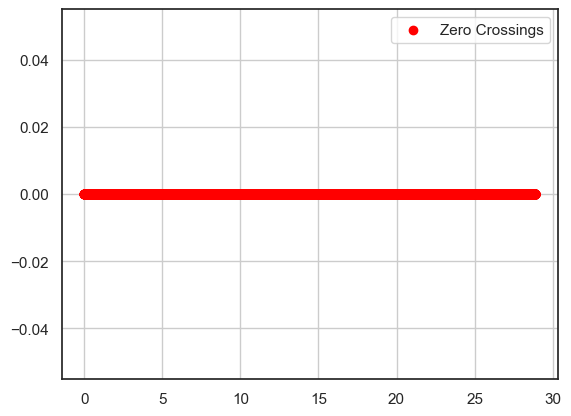

In [46]:
# Plot detected zero crossings
plt.scatter(crossings / fs, np.zeros_like(crossings), color='red', label='Zero Crossings')

# Show the plot
plt.legend()
plt.grid(True)
plt.show()

## LENGTH OF SPEECH SIGNALS

In [62]:
audio_files = glob('C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\audio1_12_2.wav')

# Play audio file
ipd.Audio(audio_files[0])

y: [0.00813555 0.01016223 0.00624926 0.00552257 0.00436004 0.00569474
 0.00576867 0.00692859 0.00544951 0.00436367]
shape y: (48808,)
sr: 22050


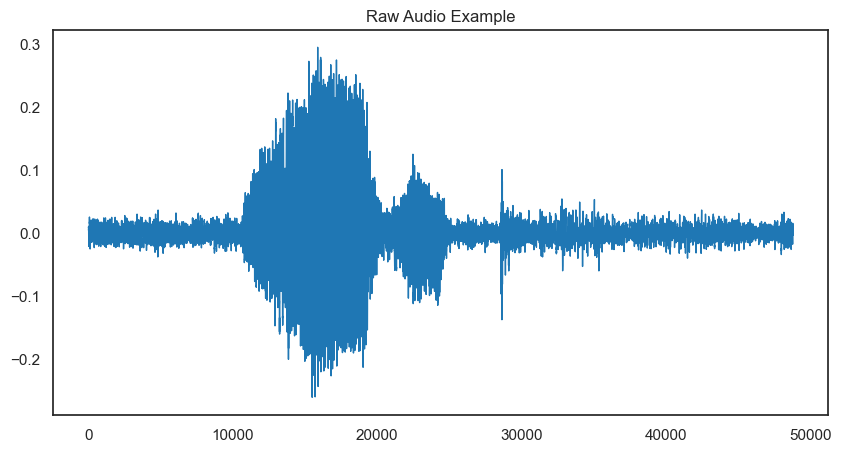

In [63]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

In [64]:
audio_files = glob('C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\audio2_12_2.wav')

# Play audio file
ipd.Audio(audio_files[0])

y: [ 0.00463337  0.00662944  0.00559441  0.00494407  0.00228207  0.00075245
 -0.00146125 -0.00197633 -0.00278499 -0.00332831]
shape y: (54100,)
sr: 22050


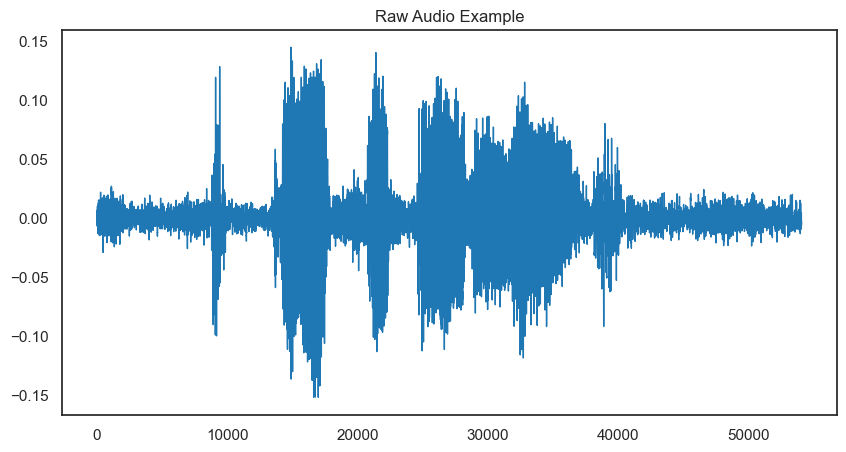

In [65]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

In [66]:
audio_files = glob('C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\audio3_12_2.wav')

# Play audio file
ipd.Audio(audio_files[0])

y: [ 0.00501068  0.004862    0.00047638 -0.00243488 -0.00632872 -0.00790892
 -0.01008044 -0.01026503 -0.00943164 -0.00698931]
shape y: (66448,)
sr: 22050


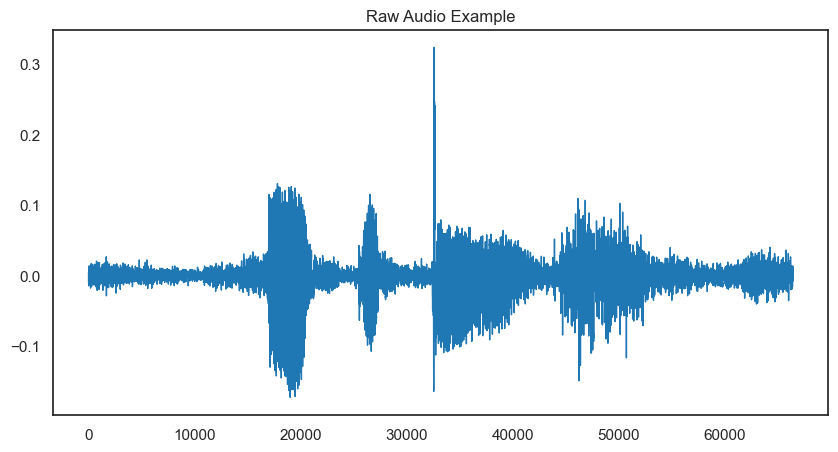

In [67]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

In [68]:
audio_files = glob('C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\audio4_12_2.wav')

# Play audio file
ipd.Audio(audio_files[0])

y: [0.01002118 0.01195194 0.00695033 0.00629014 0.00515422 0.00706001
 0.00591081 0.00609914 0.00431767 0.00261838]
shape y: (51013,)
sr: 22050


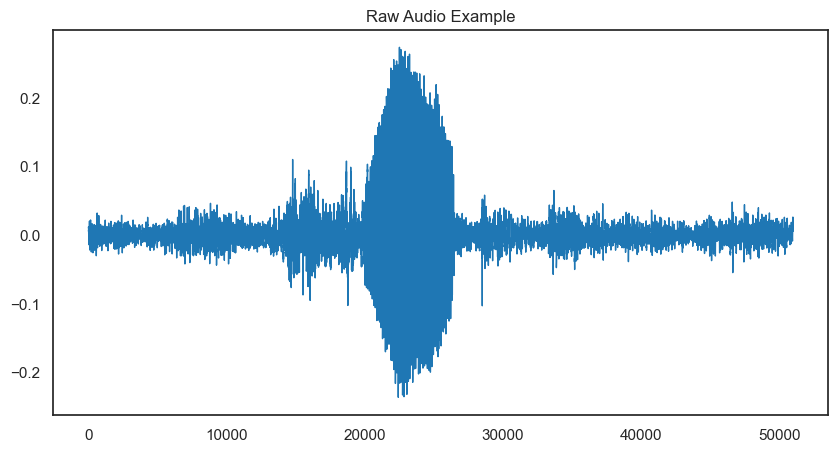

In [69]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

In [71]:
audio_files = glob('C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\audio5_12_2.wav')

# Play audio file
ipd.Audio(audio_files[0])

y: [0.01777093 0.02575405 0.02260794 0.02271521 0.01666794 0.01452078
 0.00877932 0.00631468 0.00357251 0.00247271]
shape y: (63361,)
sr: 22050


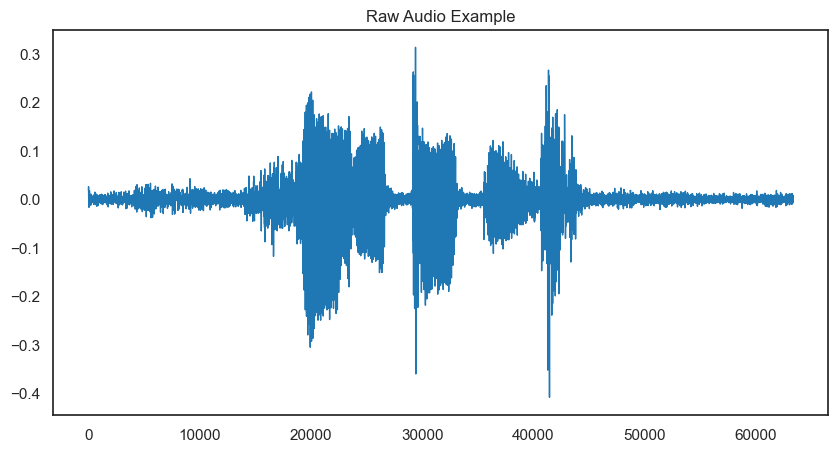

In [72]:
y, sr = librosa.load(audio_files[0])
print(f'y: {y[:10]}')
print(f'shape y: {y.shape}')
print(f'sr: {sr}')
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example',
                 color=color_pal[0])
plt.show()

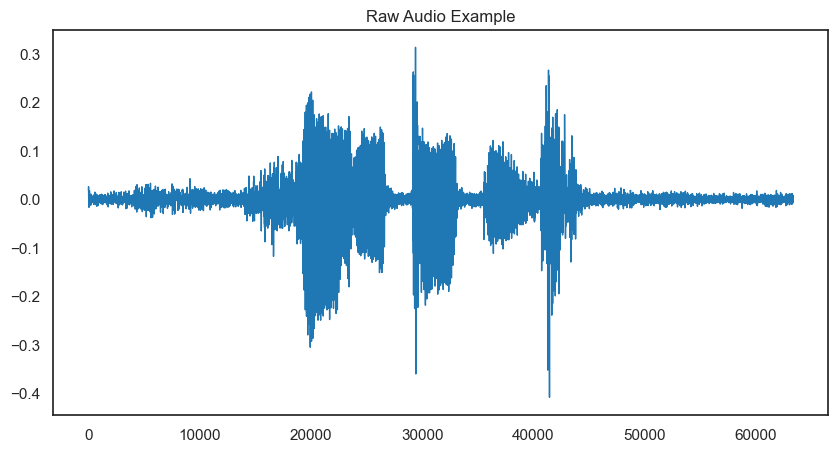

### comparing the lengths

In [73]:
import soundfile as sf

def compute_duration(audio_file):
    """
    Compute the duration of speech signal in an audio file.
    
    Args:
        audio_file: Path to the audio file.
        
    Returns:
        Duration of the speech signal in seconds.
    """
    try:
        data, fs = sf.read(audio_file)
    except Exception as e:
        print("Error reading audio file:", e)
        return None
    
    # Compute duration in seconds
    duration = len(data) / fs
    return duration

# List of paths to audio files
audio_files = [
    'C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\audio1_12_2.wav',
    'C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\audio2_12_2.wav',
    'C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\audio3_12_2.wav',
    'C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\audio4_12_2.wav',
    'C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\audio5_12_2.wav'
]

# Dictionary to store duration of each audio file
audio_durations = {}

# Compute duration for each audio file
for audio_file in audio_files:
    duration = compute_duration(audio_file)
    if duration is not None:
        audio_durations[audio_file] = duration

# Print the durations
for audio_file, duration in audio_durations.items():
    print(f"Duration of {audio_file}: {duration:.2f} seconds")


Duration of C:\Users\DHANALAKSHMI\OneDrive\Desktop\SPECH AI\audio1_12_2.wav: 2.21 seconds
Duration of C:\Users\DHANALAKSHMI\OneDrive\Desktop\SPECH AI\audio2_12_2.wav: 2.45 seconds
Duration of C:\Users\DHANALAKSHMI\OneDrive\Desktop\SPECH AI\audio3_12_2.wav: 3.01 seconds
Duration of C:\Users\DHANALAKSHMI\OneDrive\Desktop\SPECH AI\audio4_12_2.wav: 2.31 seconds
Duration of C:\Users\DHANALAKSHMI\OneDrive\Desktop\SPECH AI\audio5_12_2.wav: 2.87 seconds


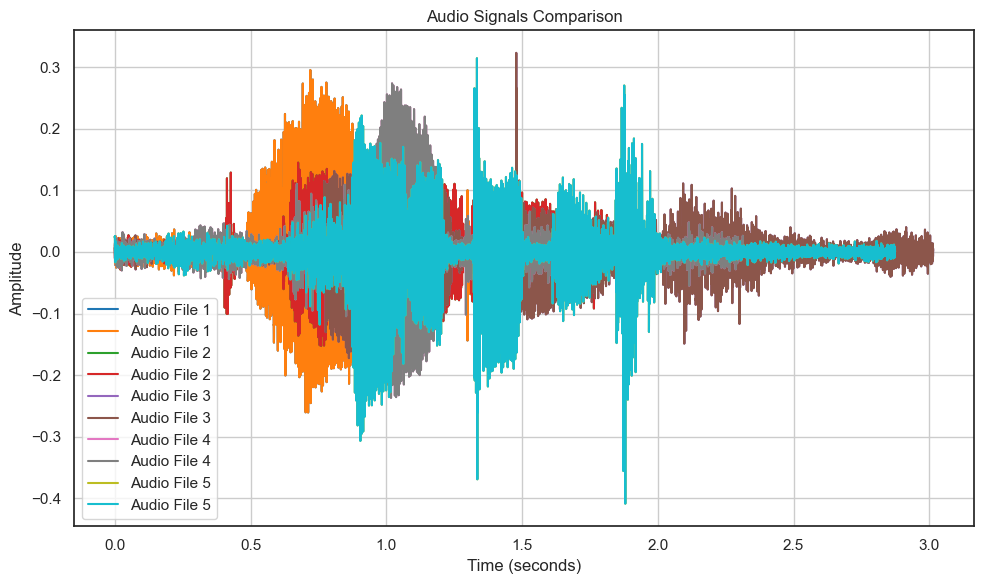

In [75]:
import matplotlib.pyplot as plt

# List of paths to audio files
audio_files = [
    'C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\audio1_12_2.wav',
    'C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\audio2_12_2.wav',
    'C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\audio3_12_2.wav',
    'C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\audio4_12_2.wav',
    'C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\audio5_12_2.wav'
]

# Plot all signals on the same plot with different colors
plt.figure(figsize=(10, 6))
for i, audio_file in enumerate(audio_files):
    data, fs = sf.read(audio_file)
    time = np.arange(len(data)) / fs
    plt.plot(time, data, label=f'Audio File {i+1}')

plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Audio Signals Comparison')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
